In [32]:
import os
import matplotlib.image as img 
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
def process_data(dir): 
    gender = "";                                
    img_objs = [];                                                                
    for subdir, dirs, files in os.walk(dir):
        
        # check if picture is in female or male folder
        
            if ("female" in subdir):
                gender = "female"
            else:
                gender = "male"
                
            # go through image files and read each image
            images_arr = [];
            d = {};
            for file in files:
                file_path = os.path.join(subdir, file)
                
                # read all image files, if it fails, specify what files failed
                try:
                    image = img.imread(file_path)
                    images_arr.append(image[:, :, 0:3])
                    
                except:
                    print("Could not read " + file_path)
                    

            # ignore the dirs that are not direct parent of img files
            if(len(subdir.split("/")) > 4):
                # zip key and values together
#                 print(subdir.split("/"))
                d["name"] = subdir.split("\\")[-1];
                d["gender"] = gender;
                d["images"] = images_arr;

            # add each dictionary to list
            img_objs.append(d)
    return img_objs


path = "./data/faces94/"
img_info = process_data(path)
img_info = [i for i in img_info if i]

Could not read ./data/faces94/.DS_Store
Could not read ./data/faces94/malestaff/anonym1/rename~
Could not read ./data/faces94/male/dakram/.dir3_0.wmd
Could not read ./data/faces94/female/.DS_Store


In [3]:
labels = ["male", "female"]
images = []
all_labels = []
for info in img_info:
    for i in info["images"]:
        images.append(i)
        all_labels.append(labels.index(info["gender"]))

images = np.array(images)
all_labels = np.array(all_labels)
print(all_labels.shape)
all_labels = all_labels.reshape(3078, 1)

(3078,)


In [4]:
print(images.shape)

(3078, 200, 180, 3)


In [5]:
image_smote = images.reshape(3078, 200*180*3)

In [6]:
sm = SMOTE()
image_smote, label_smote = sm.fit_resample(image_smote, all_labels)

In [7]:
print(label_smote.shape)
label_smote = label_smote.reshape(5320, 1)

(5320,)


In [8]:
train_images, test_images, train_labels, test_labels = train_test_split(image_smote, label_smote, train_size=0.5,test_size=0.5, stratify=label_smote)



In [9]:
from collections import Counter
count = []
print(train_images.shape)
for t in train_labels:
    count.append(t[0])
print(Counter(count))
train_images = train_images.reshape(2660, 200, 180, 3)
train_labels = train_labels.reshape(2660, 1)
test_images = test_images.reshape(2660, 200, 180, 3)
test_labels = test_labels.reshape(2660, 1)

(2660, 108000)
Counter({1: 1330, 0: 1330})


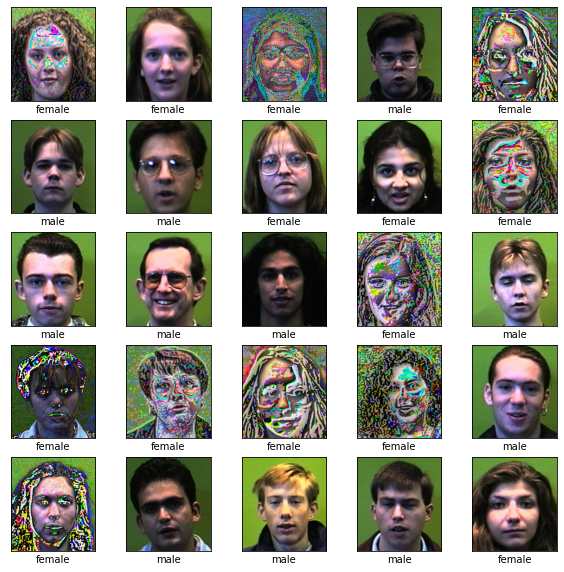

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [11]:
# labels = ["male", "female"]

# # divide images into train and test data
# train_images = np.zeros((418, 200, 180, 3))
# train_labels = np.zeros((418, 1))
# test_images = np.zeros((418, 200, 180, 3))
# test_labels = np.zeros((418, 1))
# count = 0;

# males, females = [], [];

# for info in img_info:
#     if(info["gender"]=="male"):
#         males.append(info)
#     else:
#         females.append(info)
    
# # grab random 20 men from the data set
# rand_males = random.sample(males, 20) 

# # combine the males and females into separate training and testing lists 
# train_mix = rand_males[0:10] + females[0:10]
# test_mix = rand_males[10:] + females[10:]
# # add the images and labels to the training numpy arrays
# for tr in train_mix:
#     for t in tr["images"]: 
#         train_images[count, :] = t
#         train_labels[count] = labels.index(tr["gender"]) 
#         count = count + 1

# count = 0;

# # add the images and labels to the testing numpy arrays
# for te in test_mix:
#     for t in te["images"]:  
#         test_images[count, :] = t
#         test_labels[count] = labels.index(te["gender"]) 
#         count = count + 1
    
# # convert all values of numpy arrays from float to integers 
# train_images = train_images.astype(int)
# train_labels = train_labels.astype(int)
# test_images = test_images.astype(int)
# test_labels = test_labels.astype(int)

In [12]:
# # print(train_images.shape)
# tr_img_smote = train_images.reshape(418, 200*180*3)
# te_img_smote = test_images.reshape(418, 200*180*3)
# tr_label_smote = train_labels.reshape(418, 1)
# te_label_smote = test_labels.reshape(418,1)

In [13]:
# sm = SMOTE(random_state =42)
# train_images, train_labels = sm.fit_resample(tr_img_smote, tr_label_smote)
# # test_images, test_labels = sm.fit_resample(te_img_smote, te_label_smote)

In [14]:
# print what percentage of males vs females
num_females = 0;
counter = 0;
for g in train_labels:
    num_females = g[0] + num_females
    
print("Percentage of females in training data set:", (num_females/(len(train_labels)))*100)

Percentage of females in training data set: 50.0


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(96, (11, 11), activation='relu', input_shape=(200, 180, 3), strides=(4, 4)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 43, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 21, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 21, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 10, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 10, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 10, 256)       8

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(7))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 43, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 21, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 21, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 10, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 10, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 10, 256)       8

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
84/84 [==============================] - 69s 819ms/step - loss: 18.4688 - accuracy: 0.6662 - val_loss: 0.3357 - val_accuracy: 0.8947
Epoch 2/10
84/84 [==============================] - 69s 821ms/step - loss: 0.3054 - accuracy: 0.8782 - val_loss: 0.6590 - val_accuracy: 0.7113
Epoch 3/10
84/84 [==============================] - 68s 814ms/step - loss: 0.1669 - accuracy: 0.9383 - val_loss: 0.2096 - val_accuracy: 0.9192
Epoch 4/10
84/84 [==============================] - 70s 831ms/step - loss: 0.0758 - accuracy: 0.9741 - val_loss: 0.0606 - val_accuracy: 0.9789
Epoch 5/10
84/84 [==============================] - 69s 822ms/step - loss: 0.0521 - accuracy: 0.9823 - val_loss: 0.1073 - val_accuracy: 0.9624
Epoch 6/10
84/84 [==============================] - 69s 825ms/step - loss: 0.0777 - accuracy: 0.9748 - val_loss: 0.1192 - val_accuracy: 0.9466
Epoch 7/10
84/84 [==============================] - 71s 845ms/step - loss: 0.0248 - accuracy: 0.9902 - val_loss: 0.0270 - val_accuracy: 0.992

In [69]:
# os.makedirs('models/')          # Creating a directory
model.save('models/gender.h5')
model_json = model.to_json()
with open("models/gender_architecture.json", "w") as json_file:
    json_file.write(model_json)

84/84 - 13s - loss: 0.1912 - accuracy: 0.9083


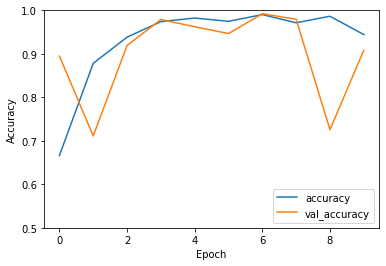

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
print(test_acc)

0.9082706570625305


In [89]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_images[1].reshape(1, 200, 180, 3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

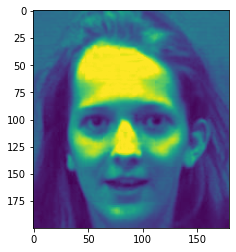

In [90]:
plt.imshow(train_images[1][:,:,0]);

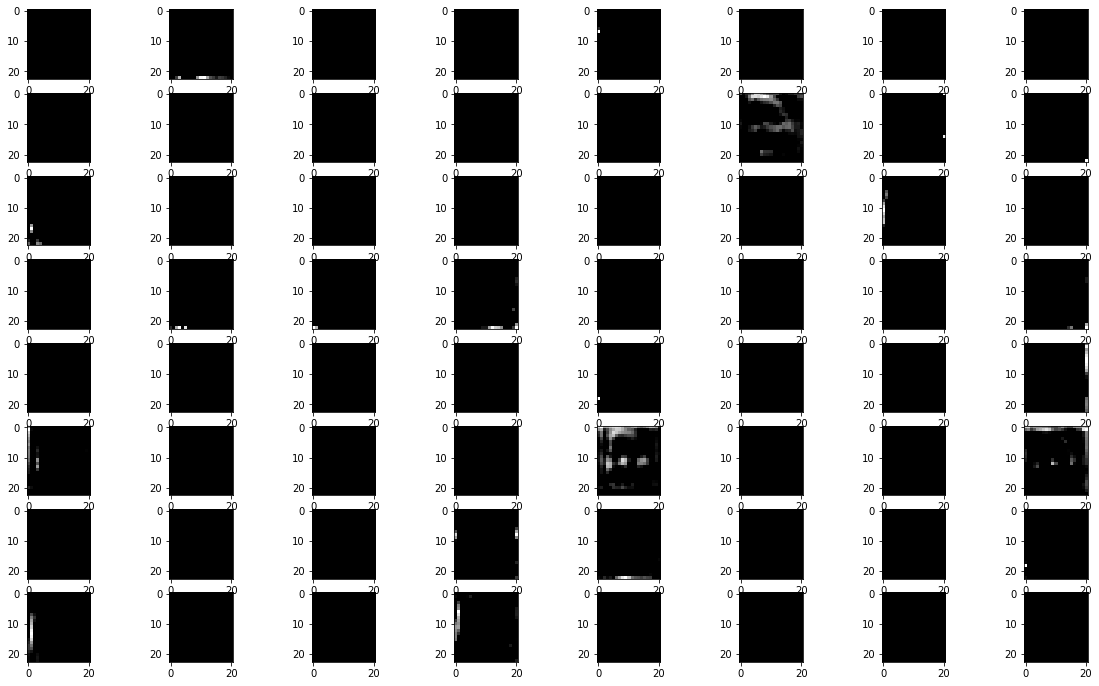

In [91]:
display_activation(activations, 8, 8, 2)

conv2d_input (1, 200, 180, 3) 


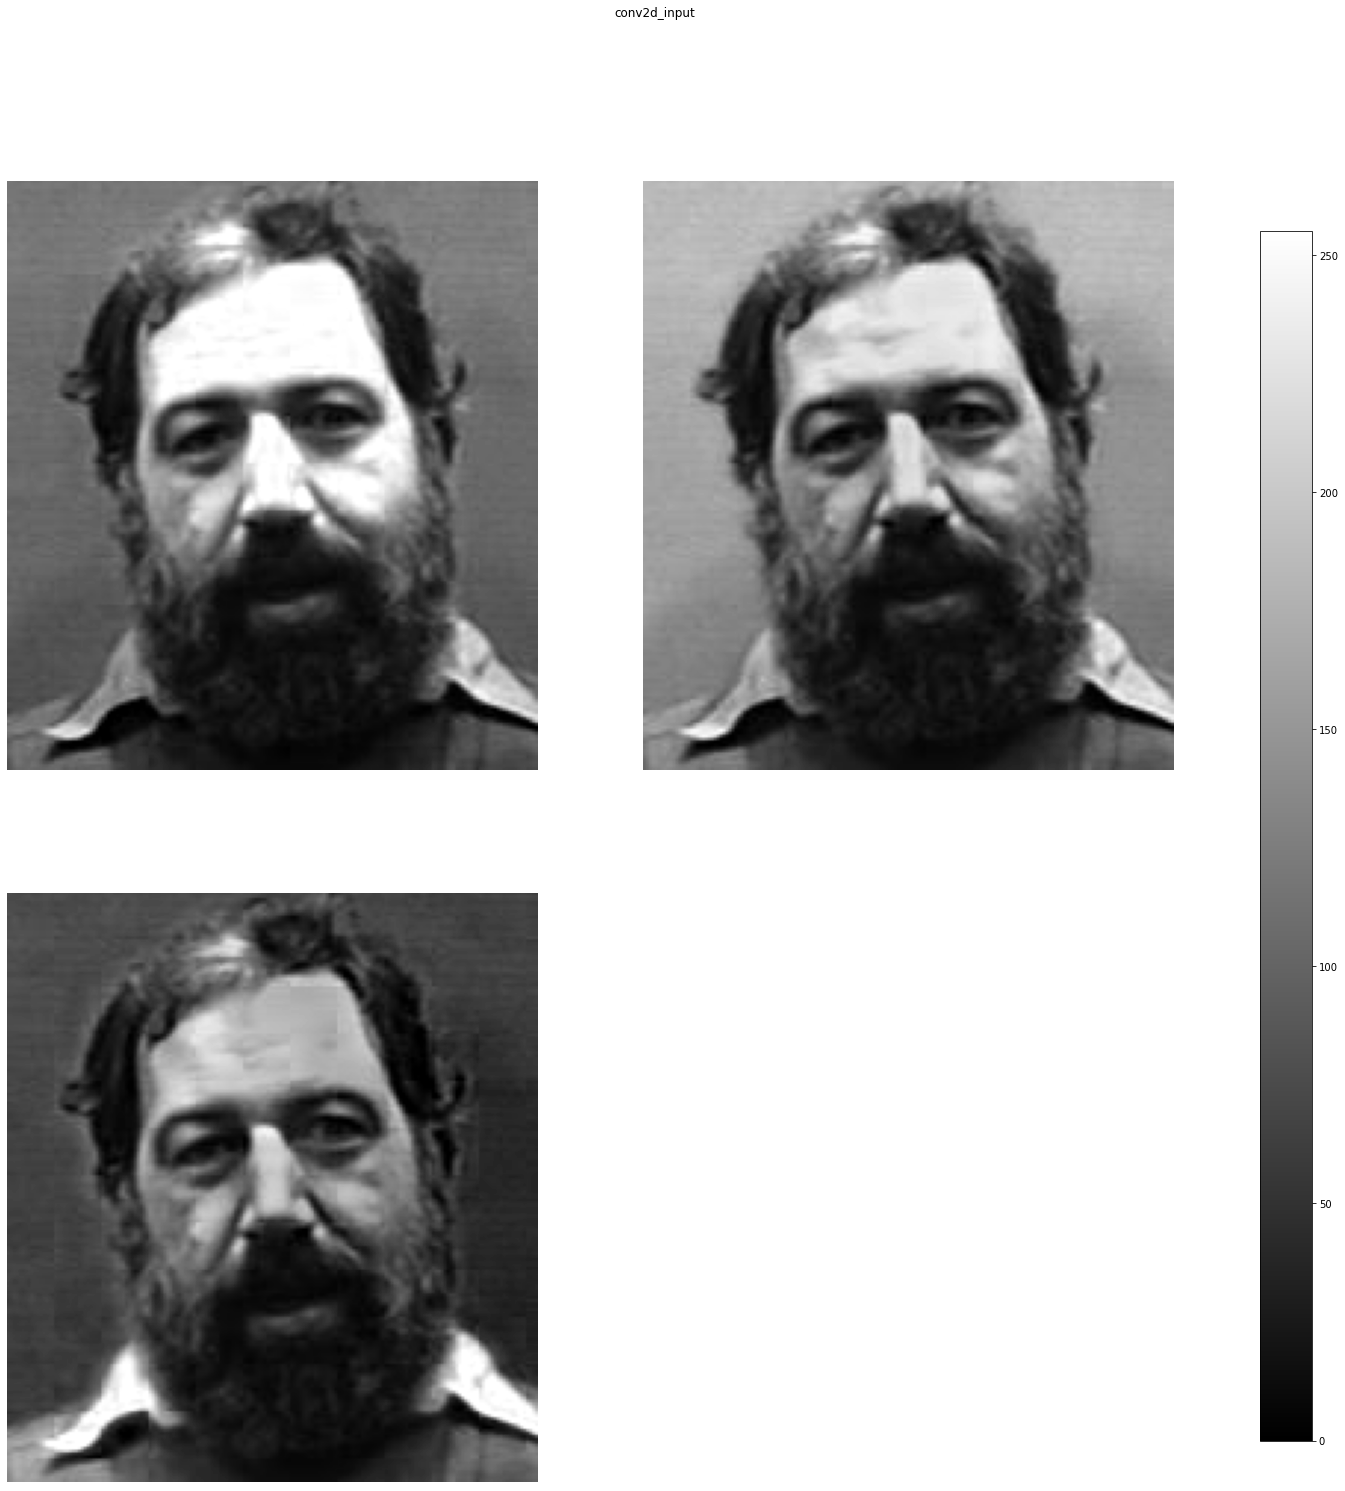

conv2d (1, 48, 43, 96) 


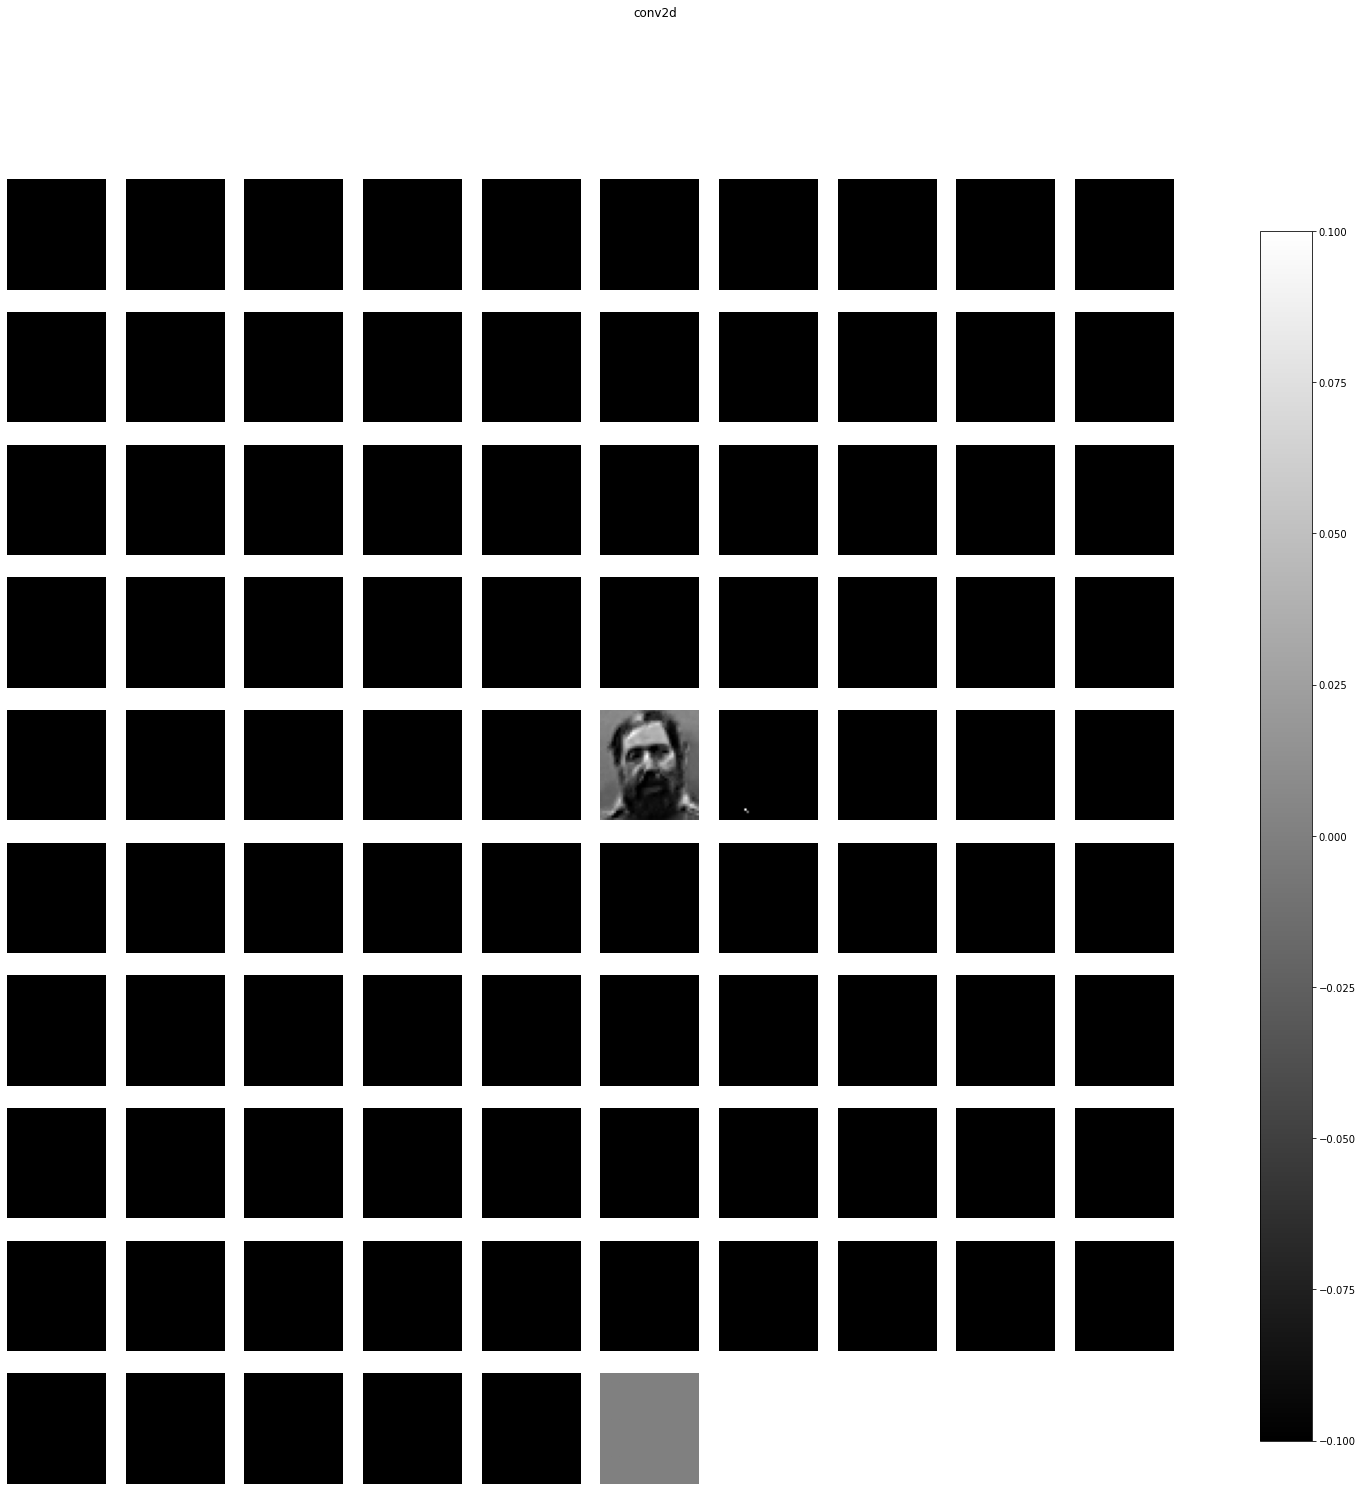

max_pooling2d (1, 23, 21, 96) 


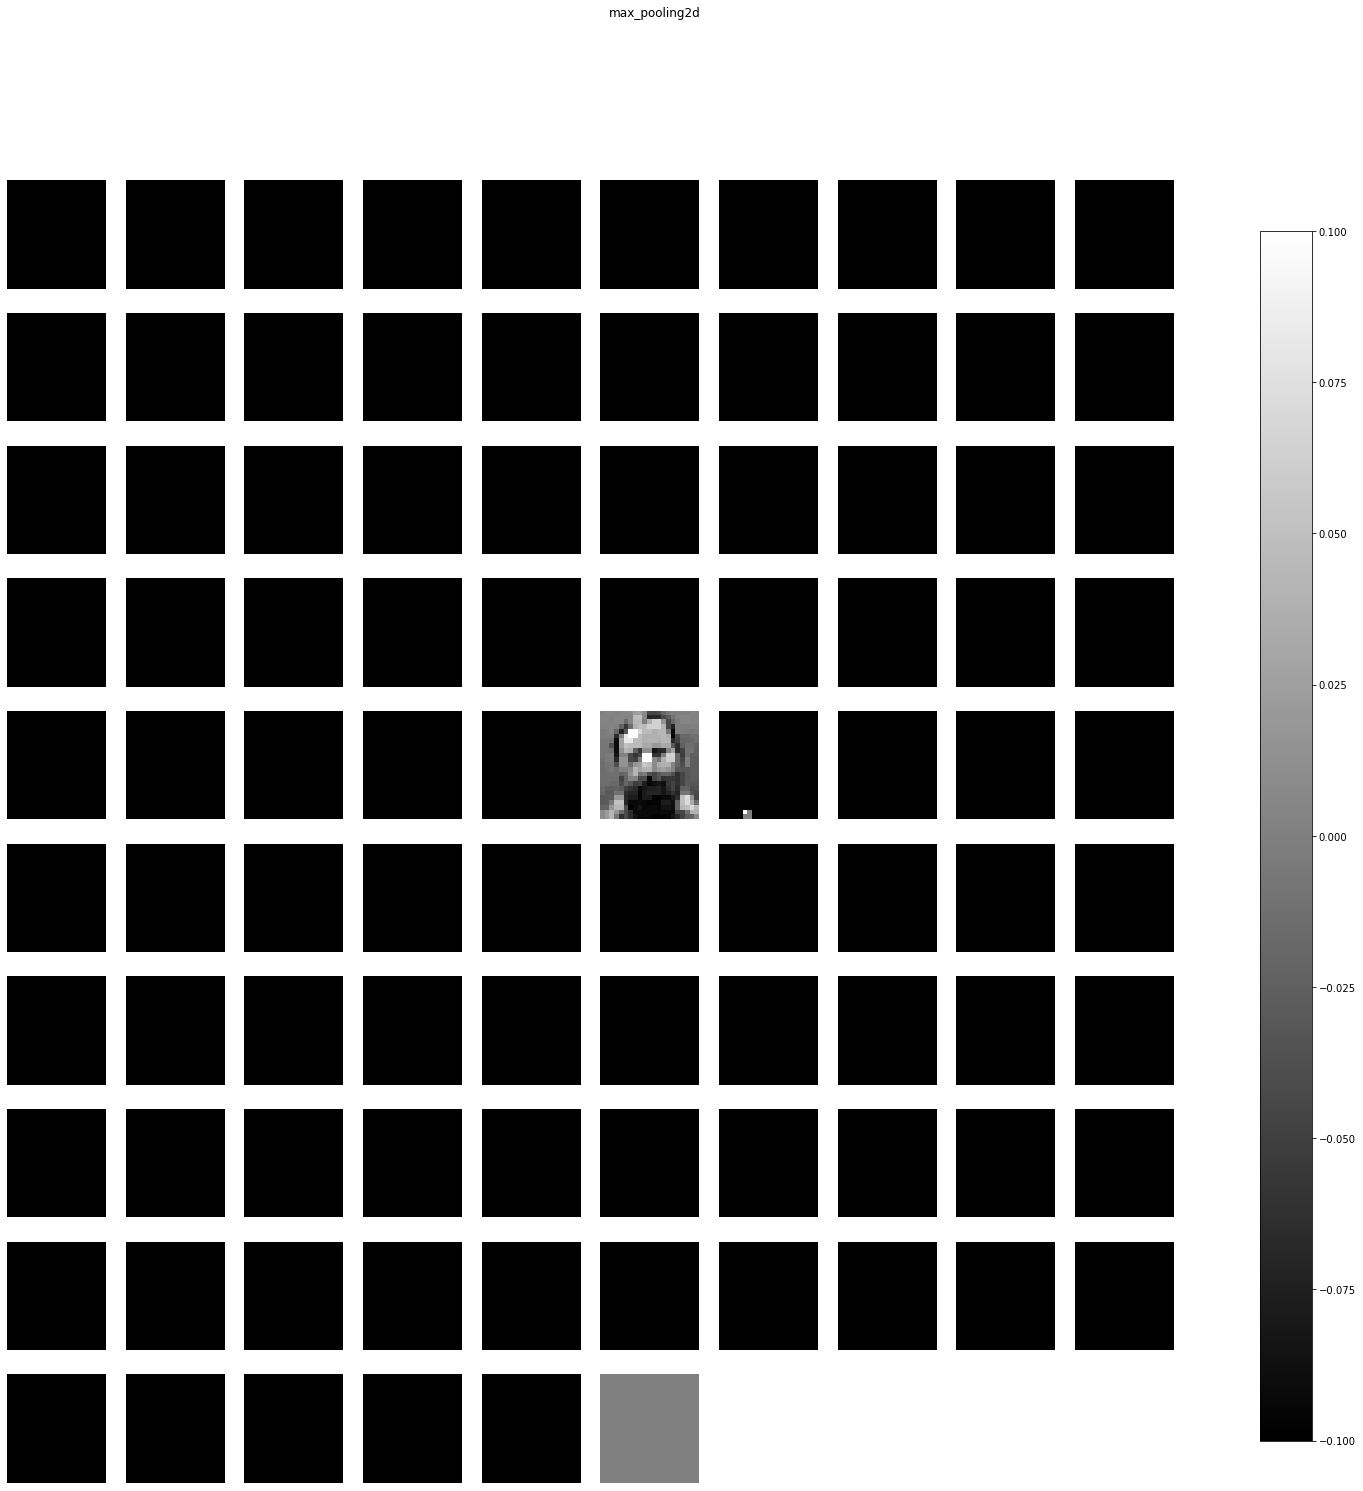

conv2d_1 (1, 23, 21, 256) 


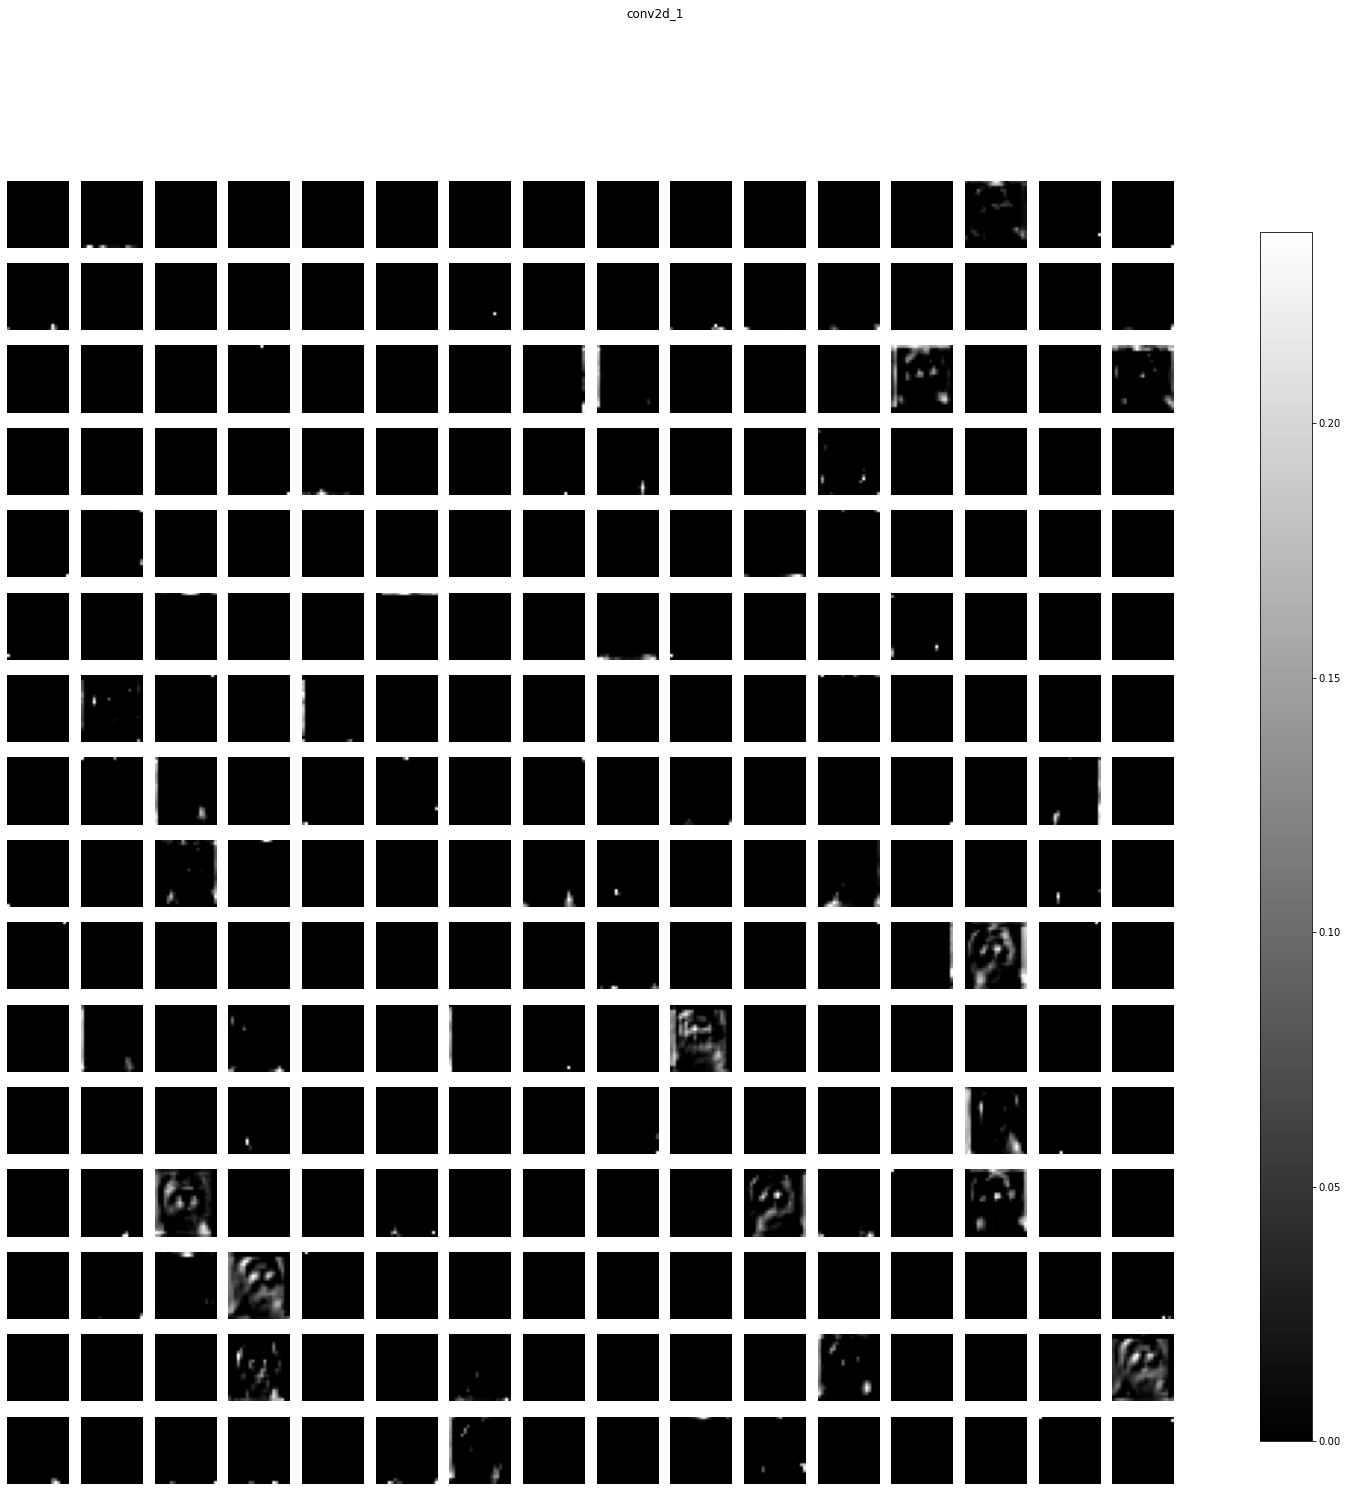

max_pooling2d_1 (1, 11, 10, 256) 


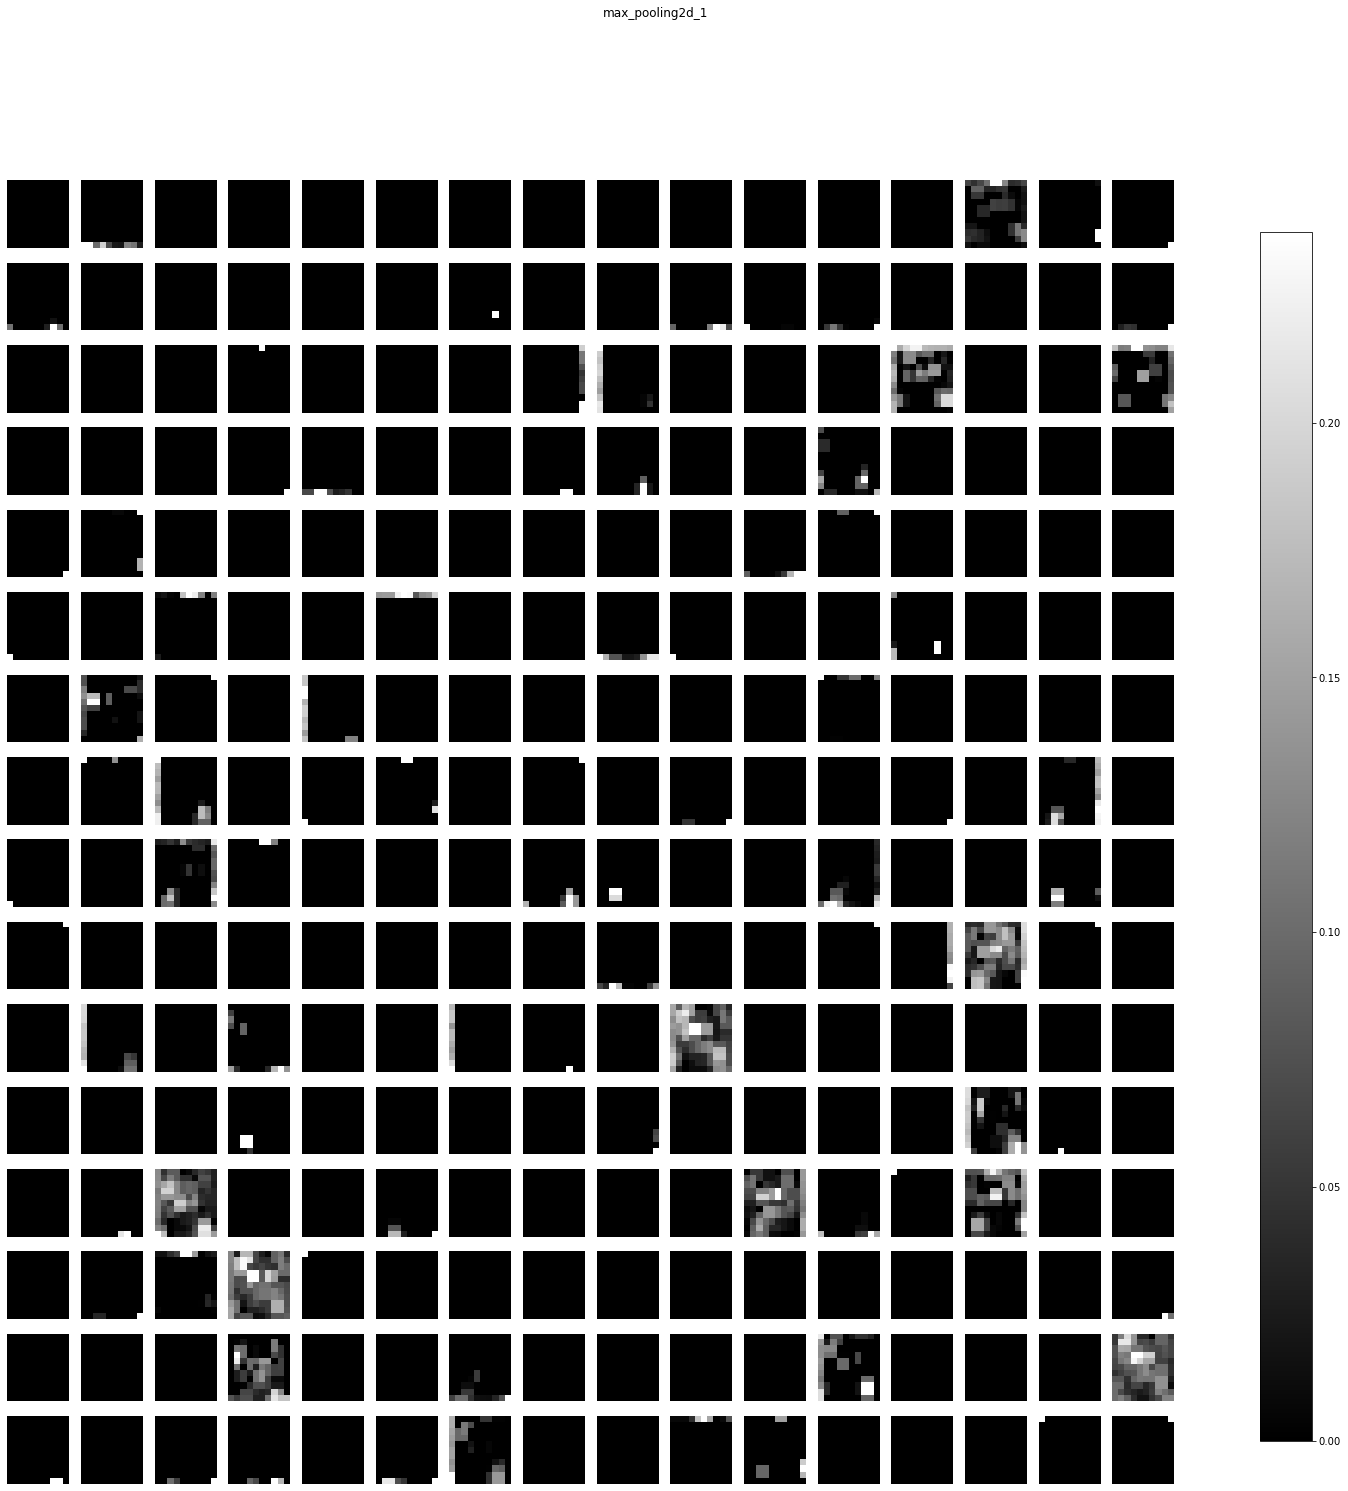

conv2d_2 (1, 11, 10, 384) 


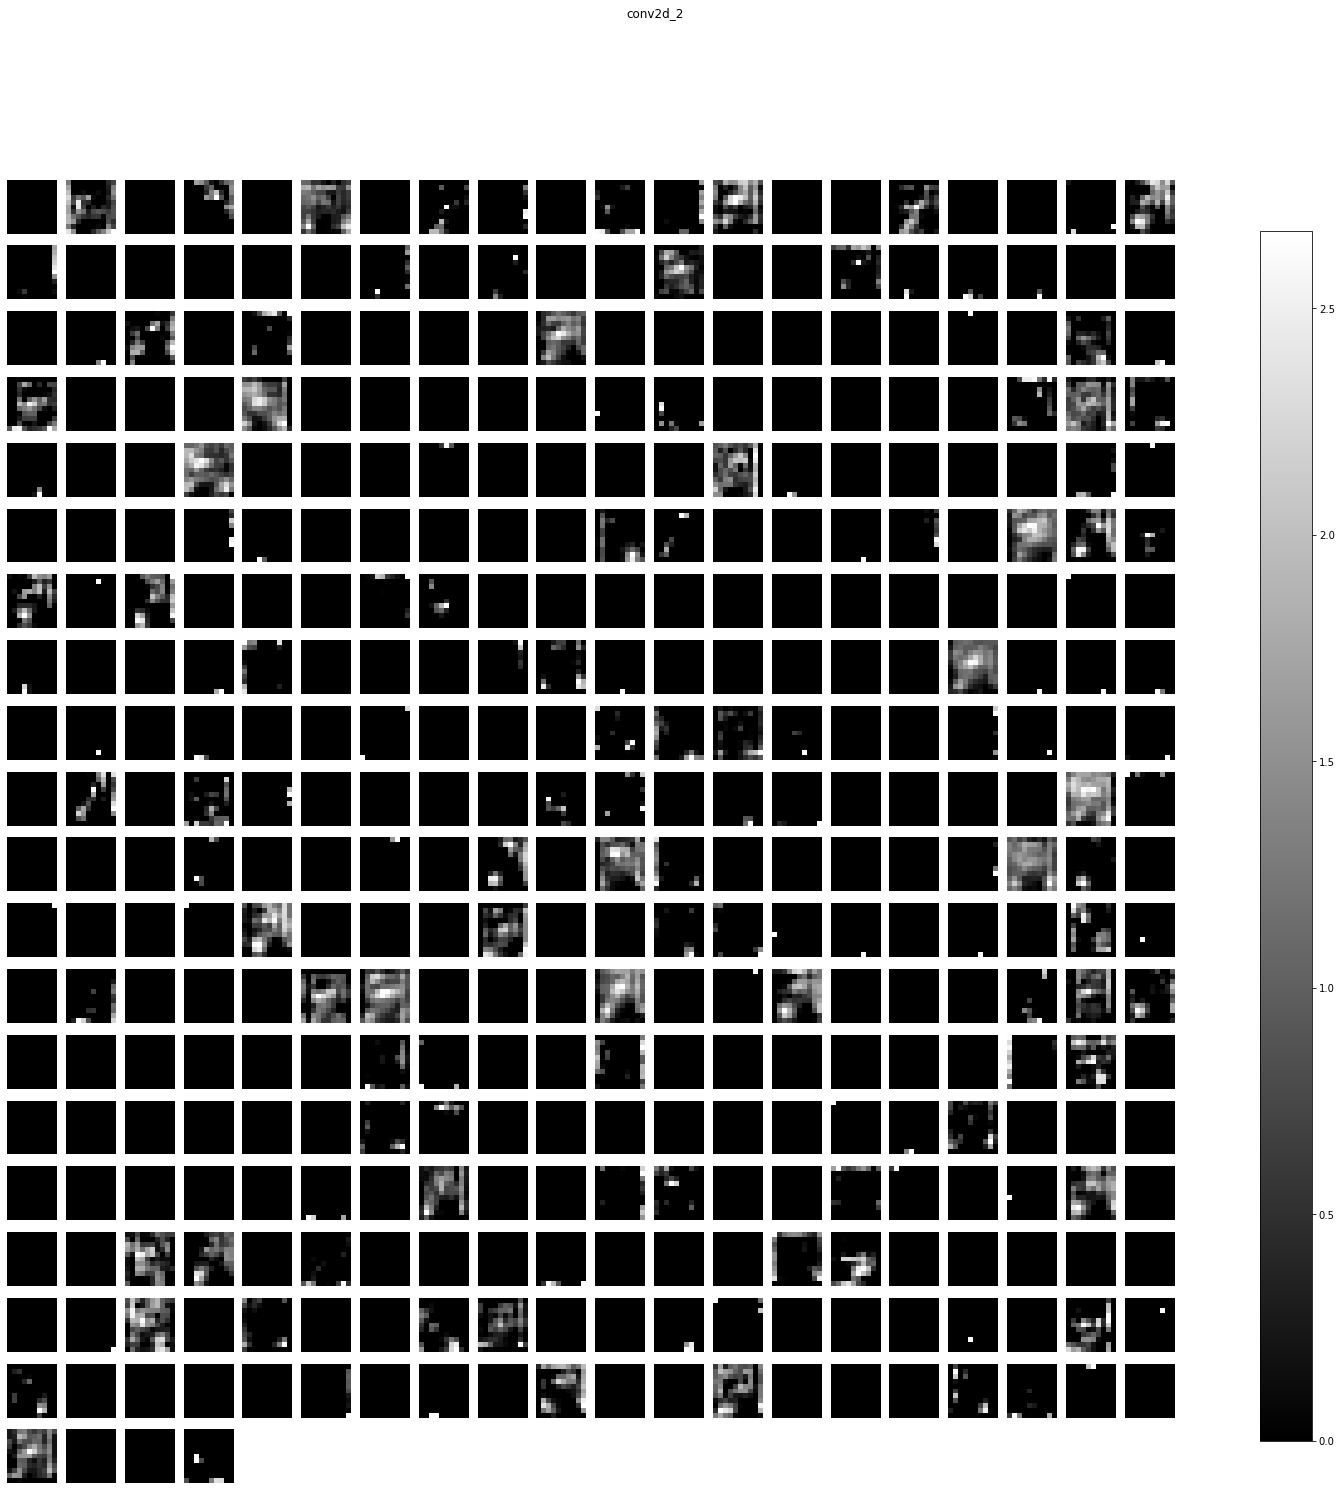

conv2d_3 (1, 11, 10, 384) 


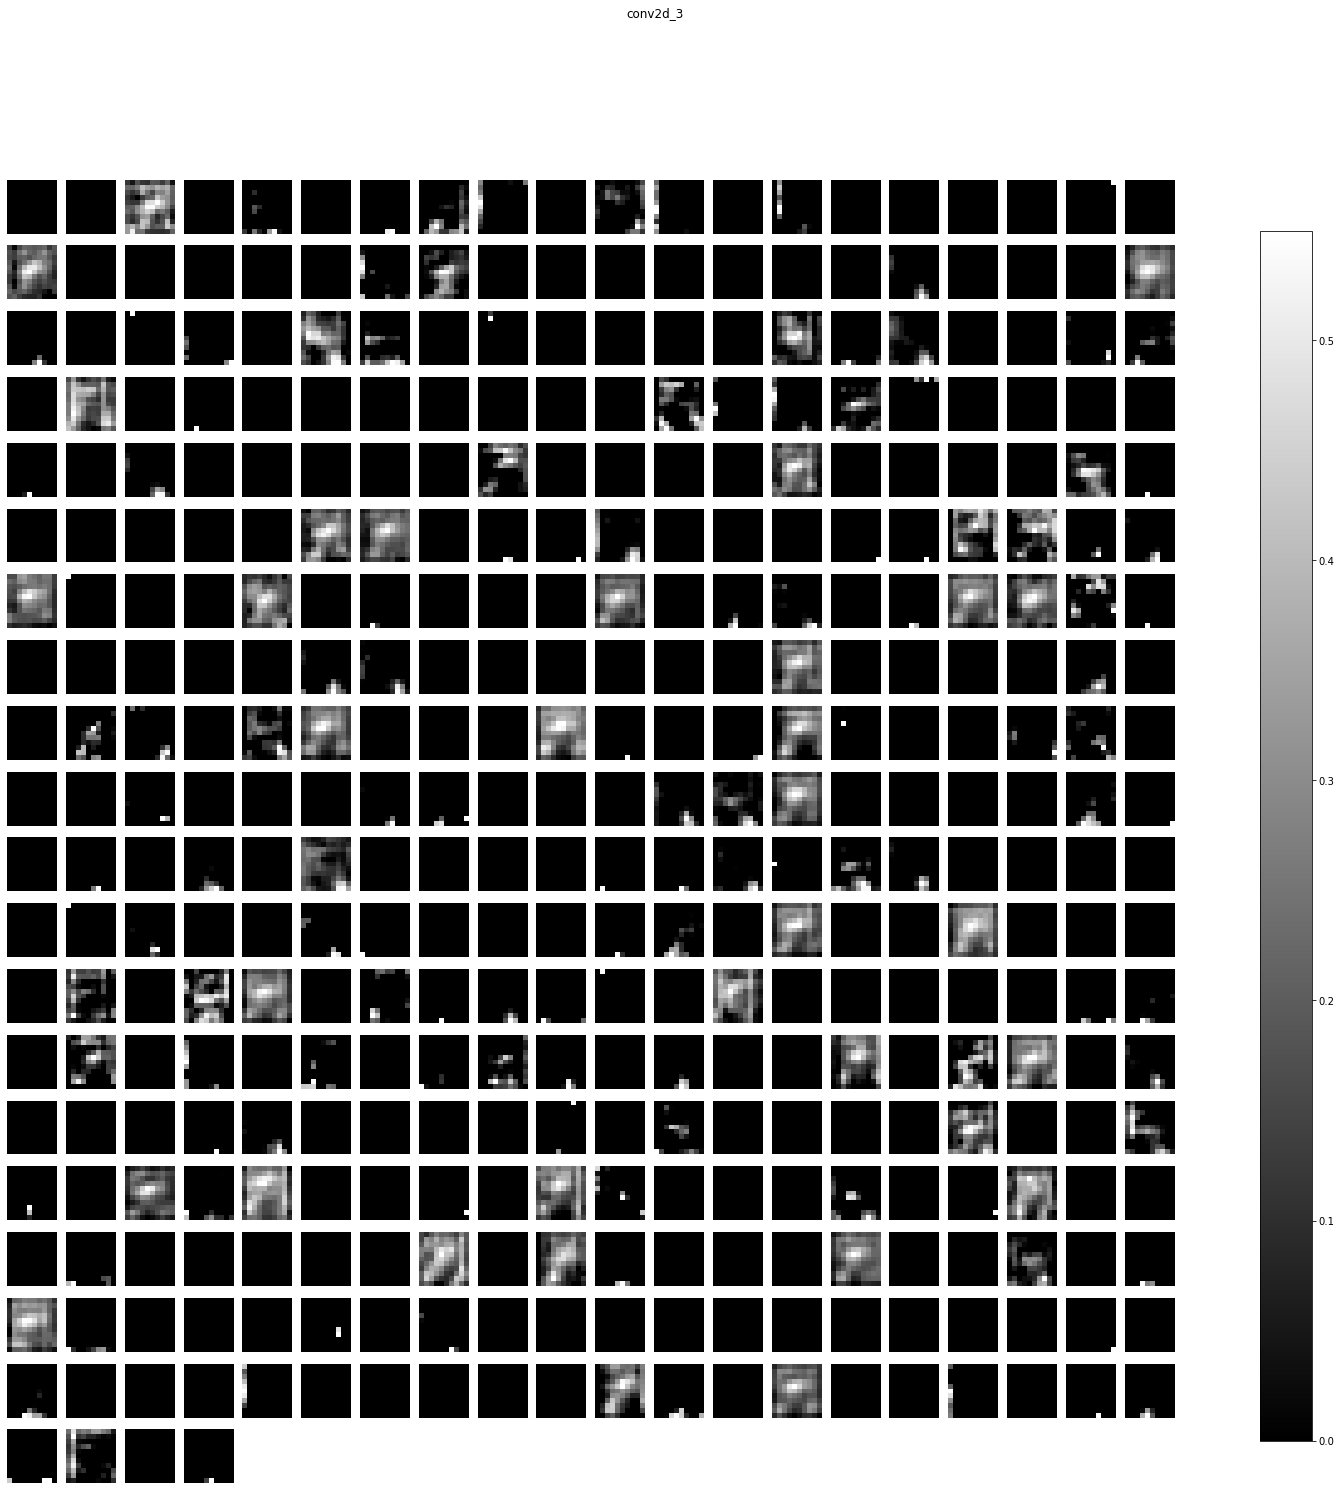

conv2d_4 (1, 11, 10, 256) 


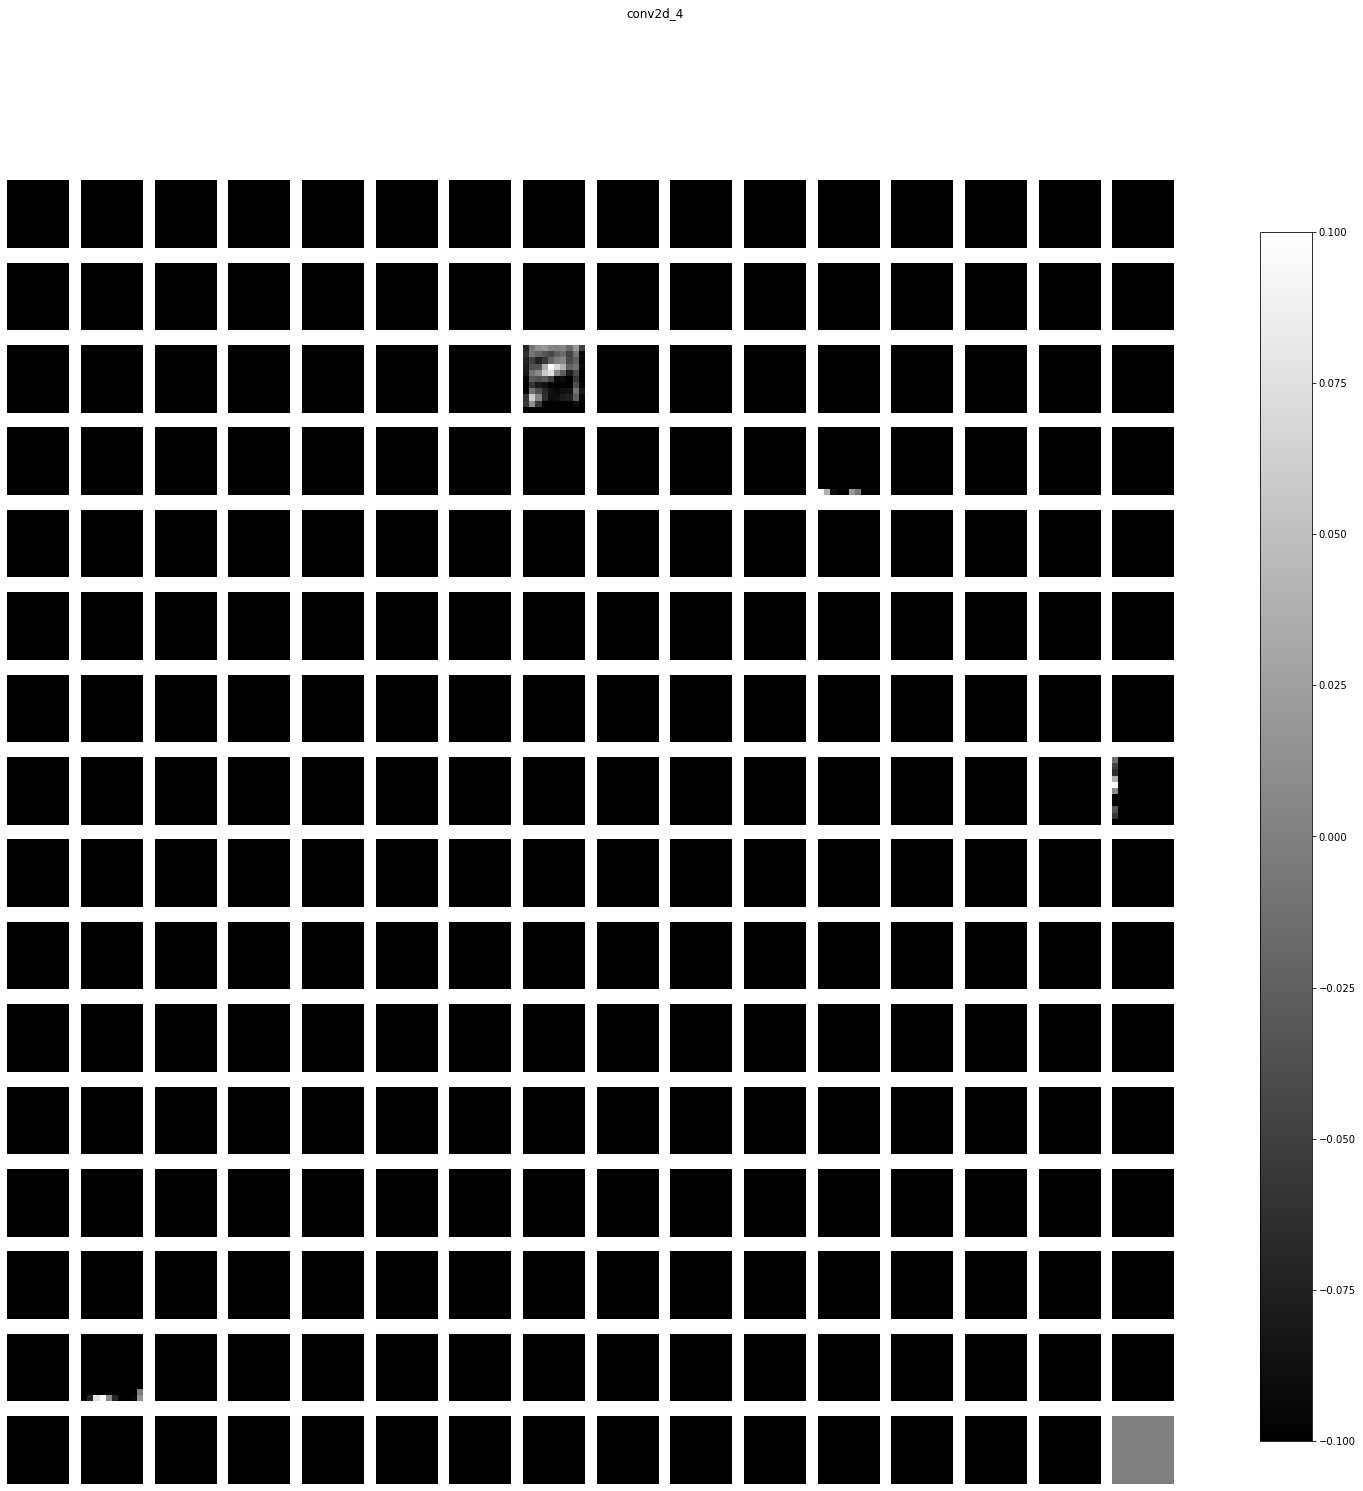

max_pooling2d_2 (1, 5, 4, 256) 


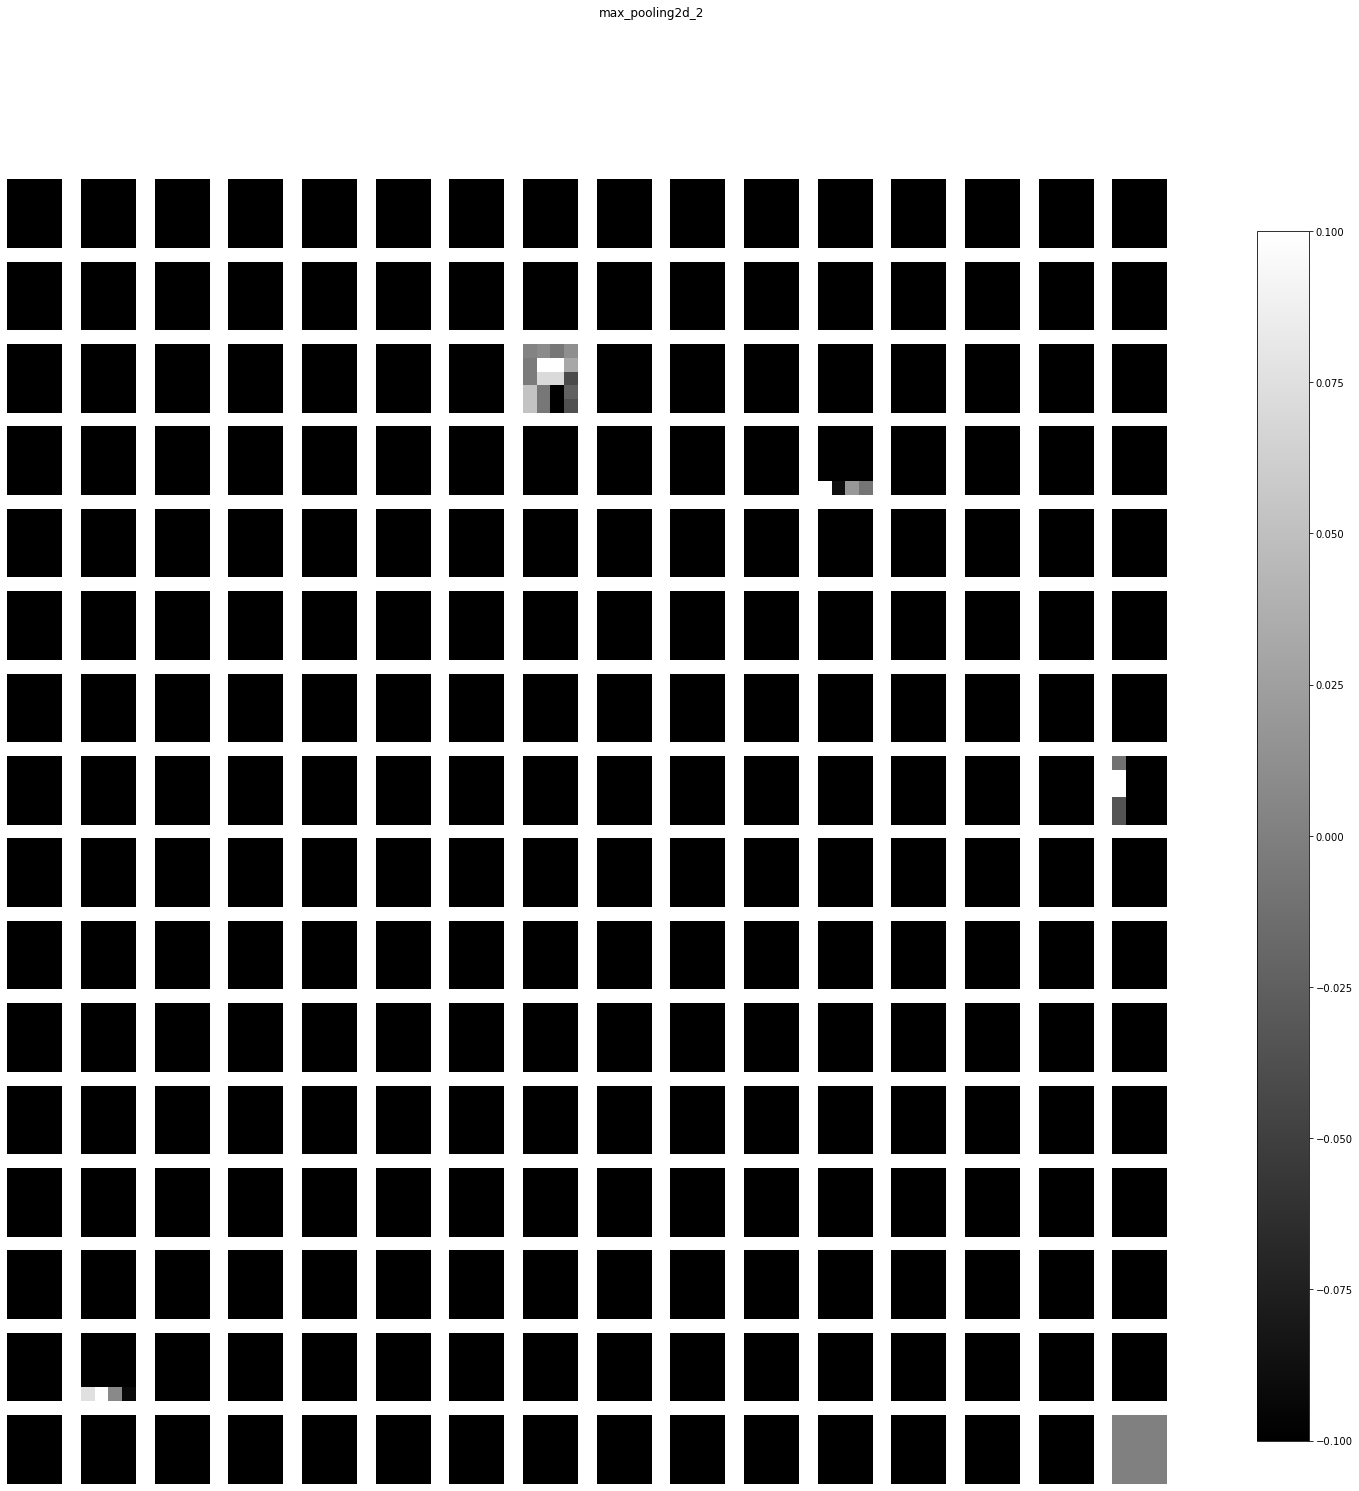

flatten (1, 5120) 


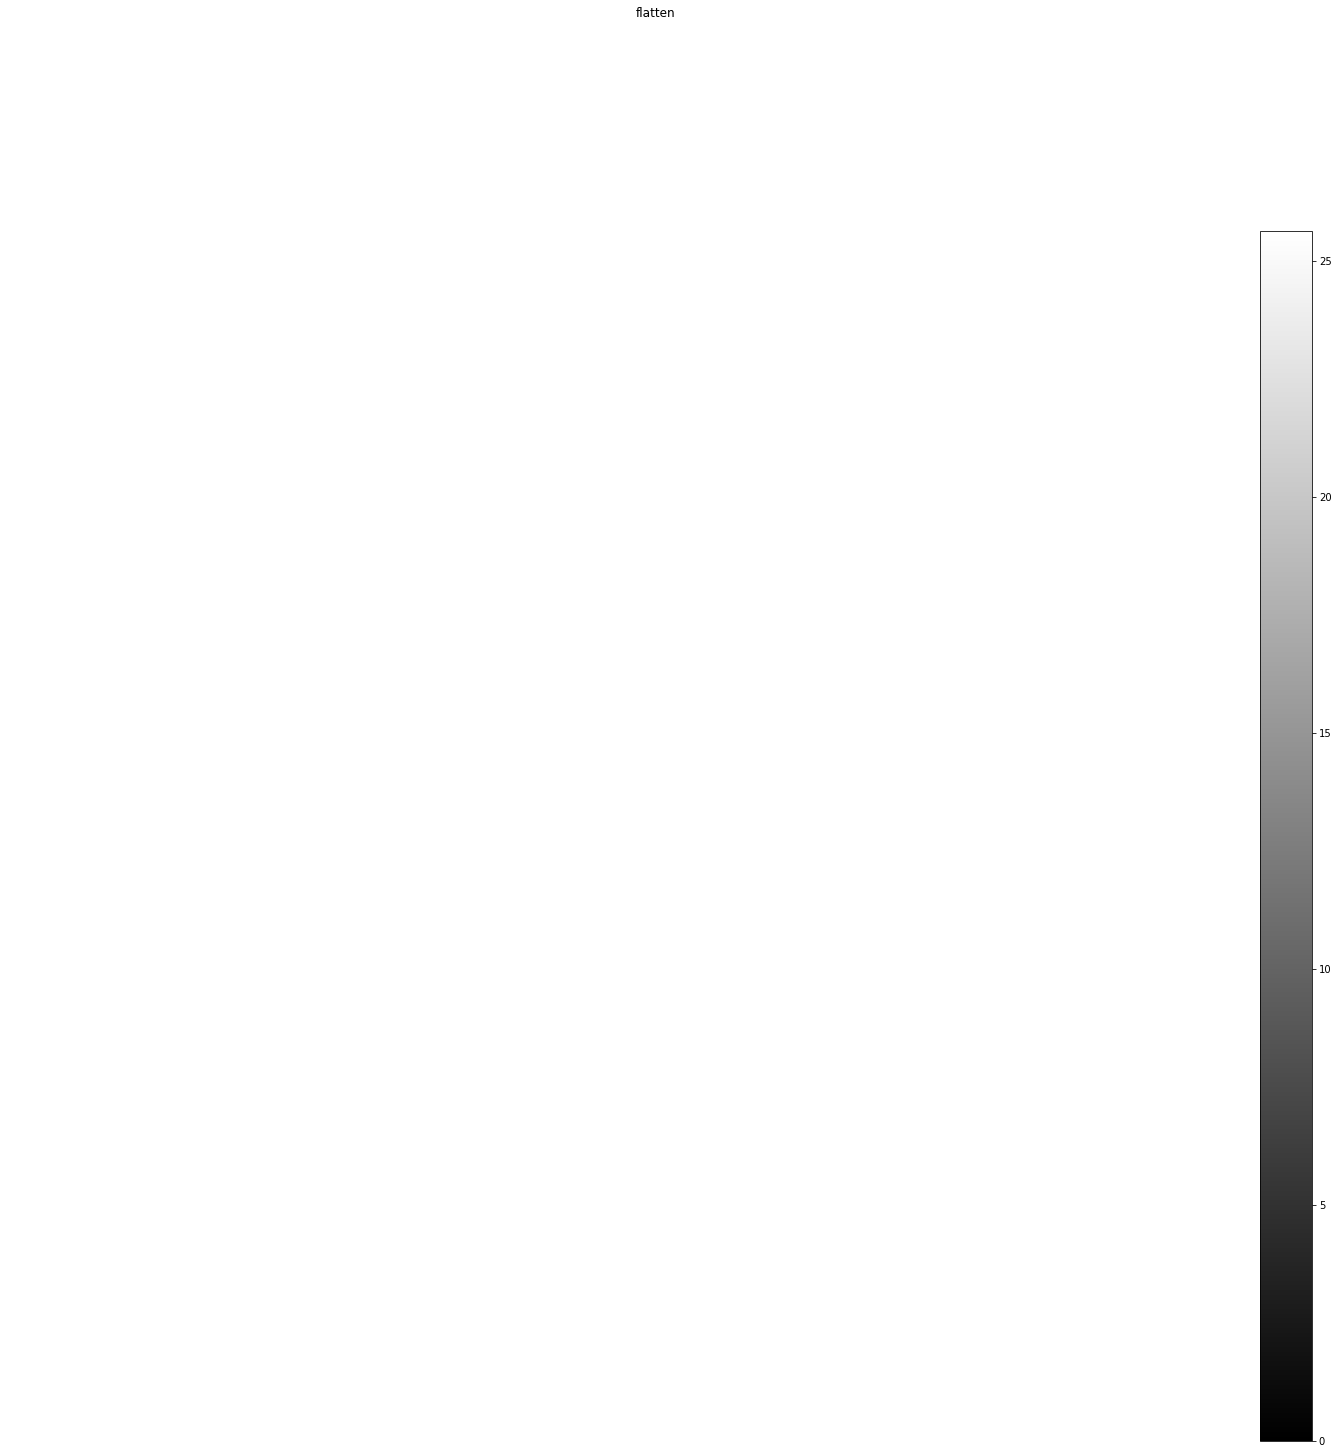

dense (1, 4096) 


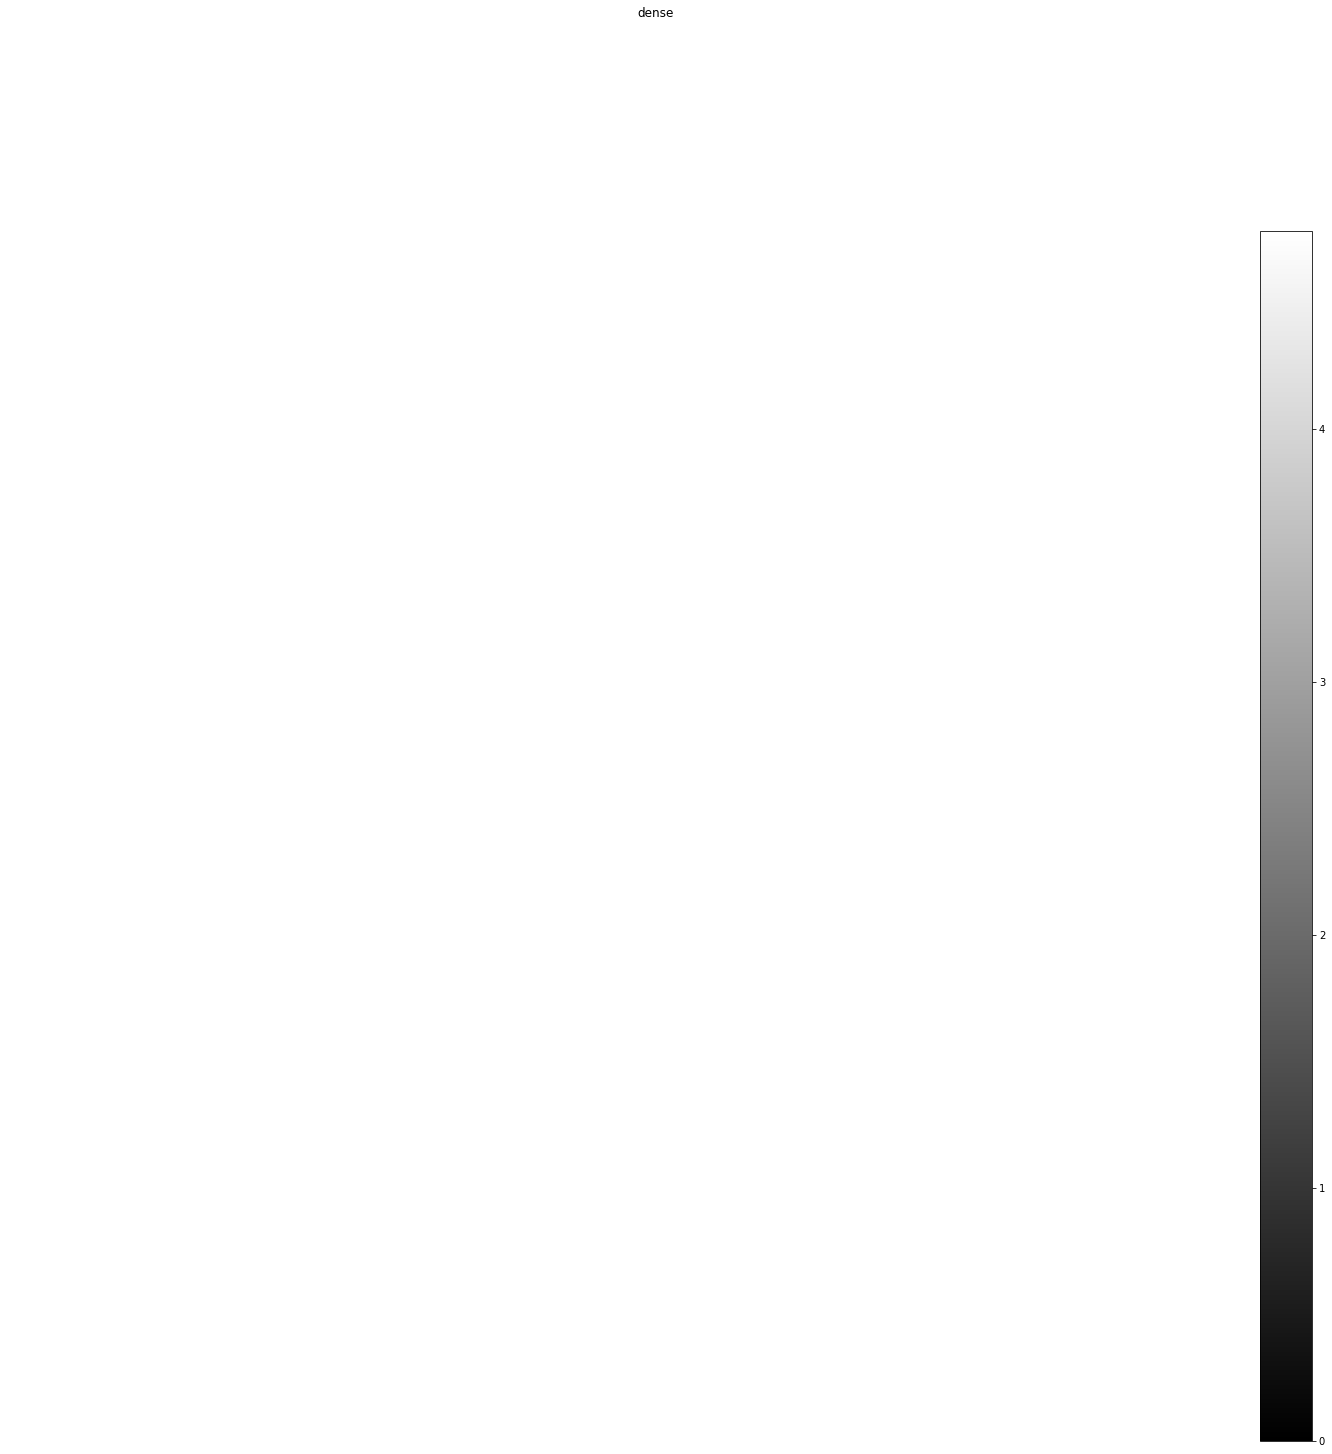

dense_1 (1, 4096) 


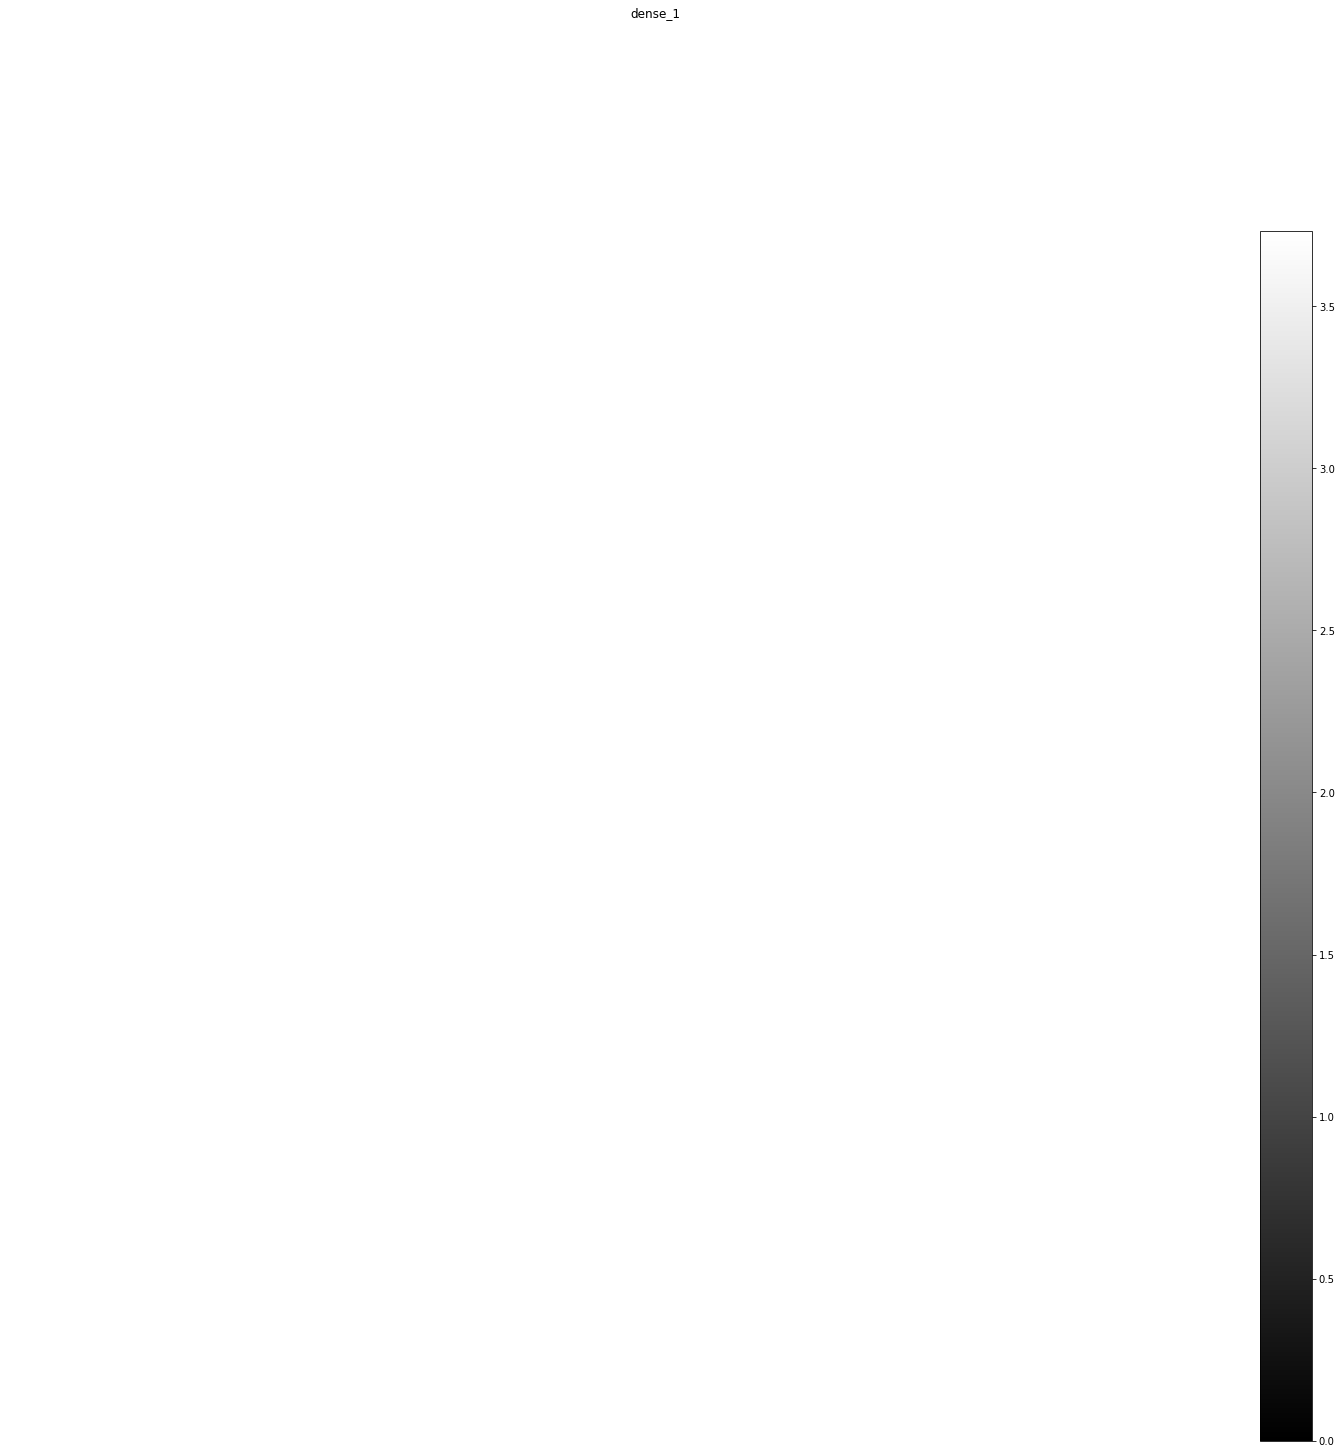

dense_2 (1, 7) 


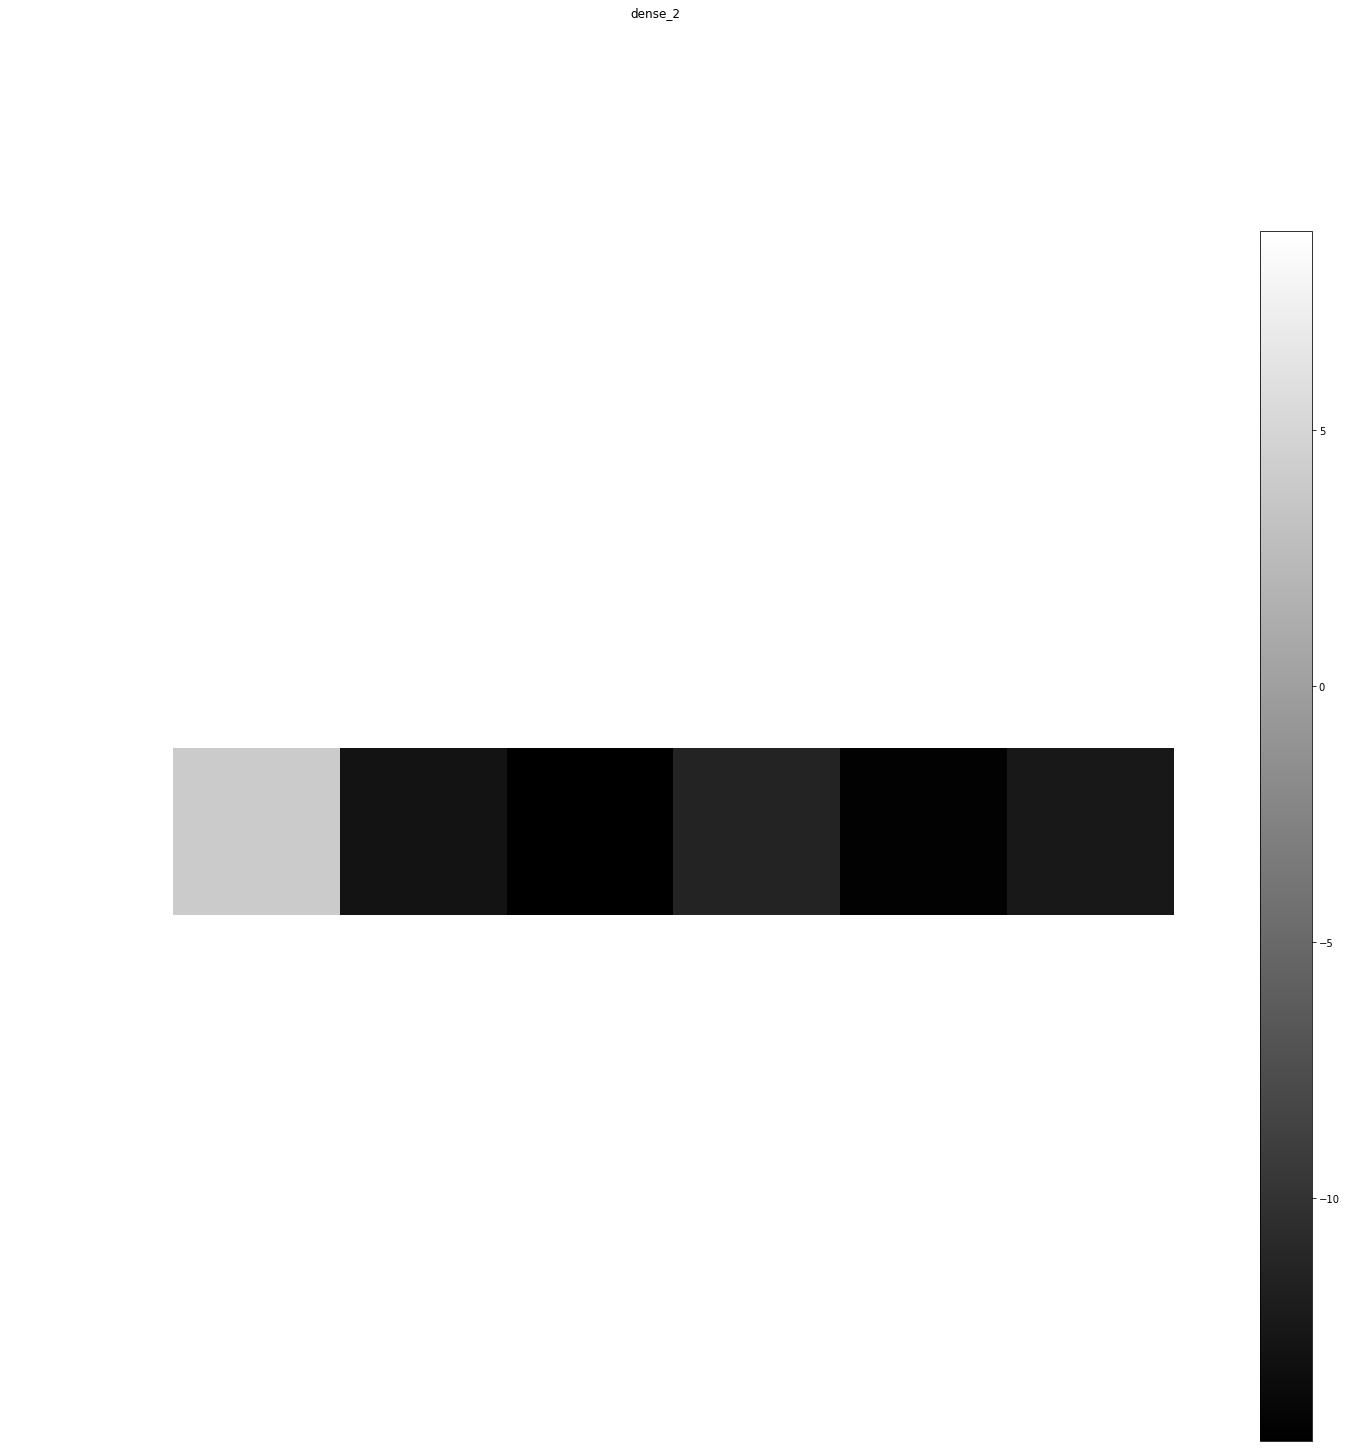

In [87]:
from keract import get_activations, display_activations, display_heatmaps
keract_inputs = test_images[1:2]
# keract_targets = test_labels[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

conv2d_input (1, 200, 180, 3) 


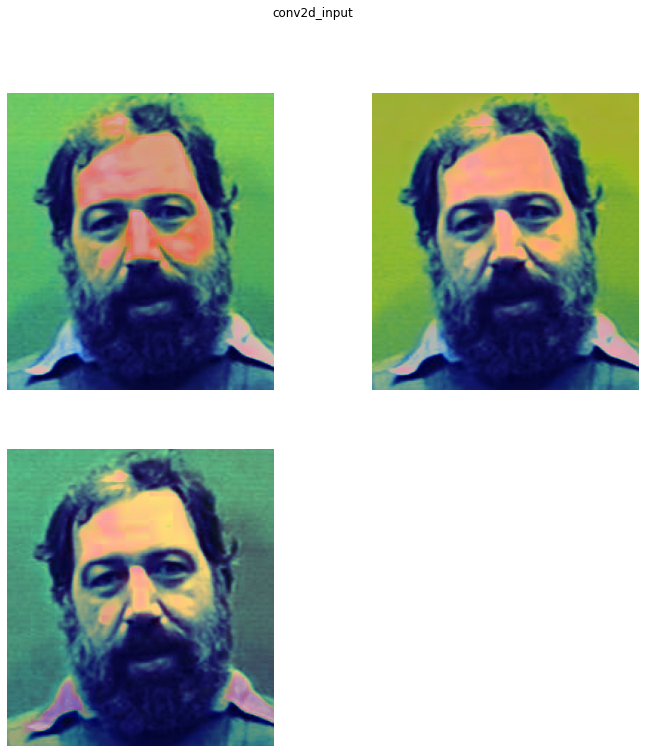

conv2d (1, 48, 43, 96) 


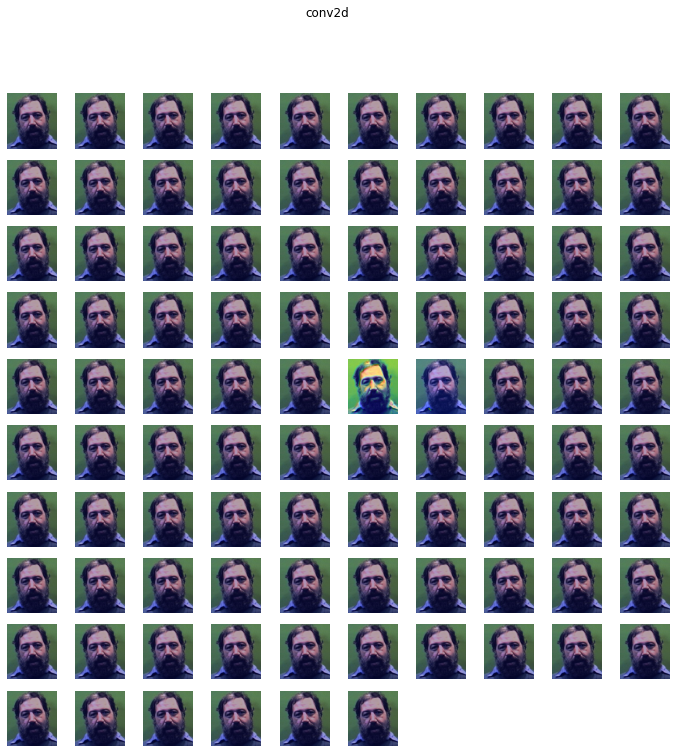

max_pooling2d (1, 23, 21, 96) 


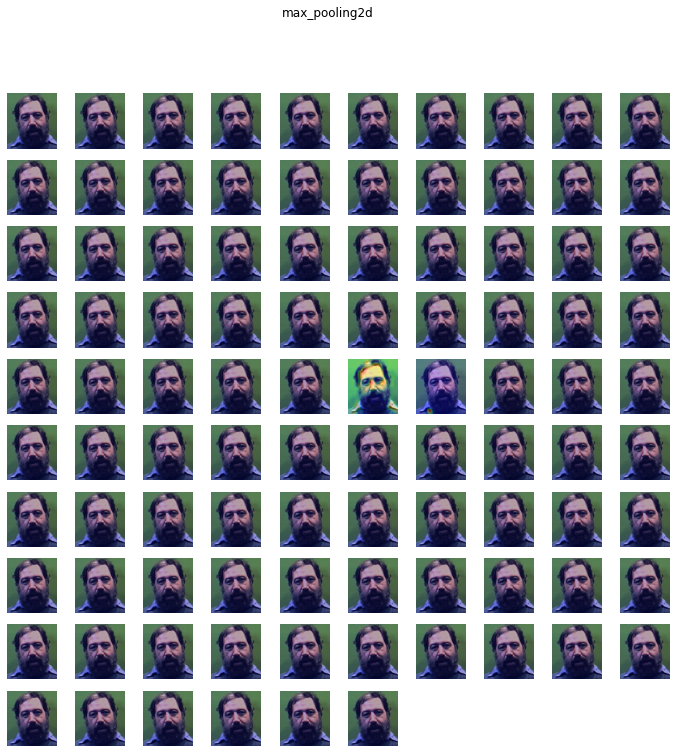

conv2d_1 (1, 23, 21, 256) 


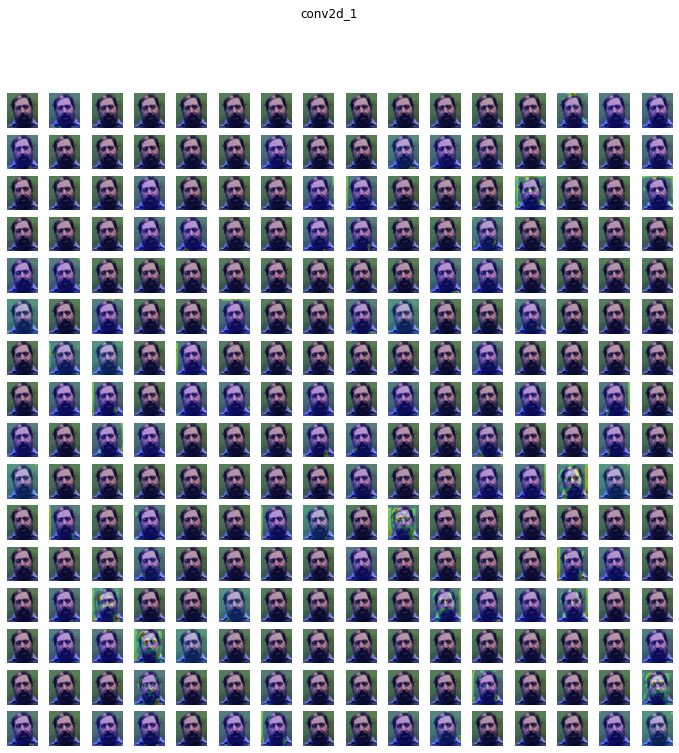

max_pooling2d_1 (1, 11, 10, 256) 


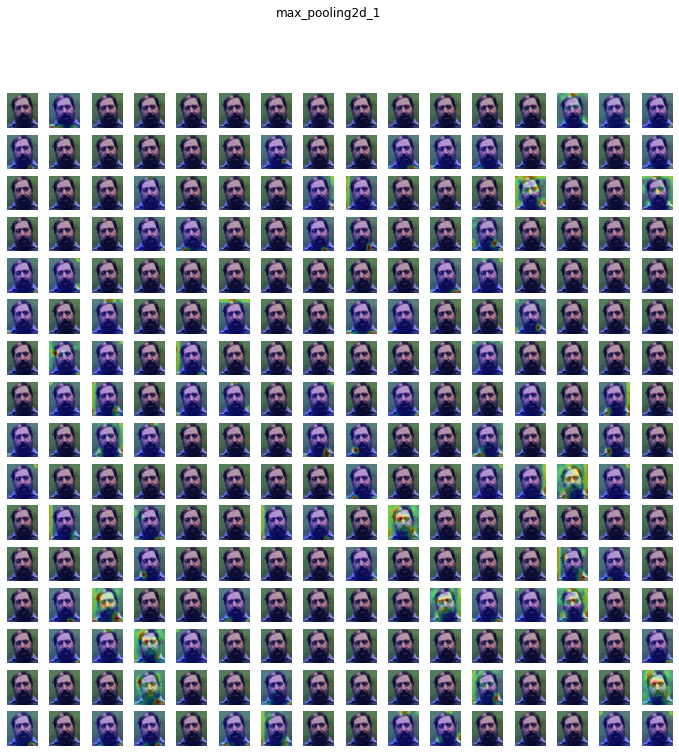

conv2d_2 (1, 11, 10, 384) 


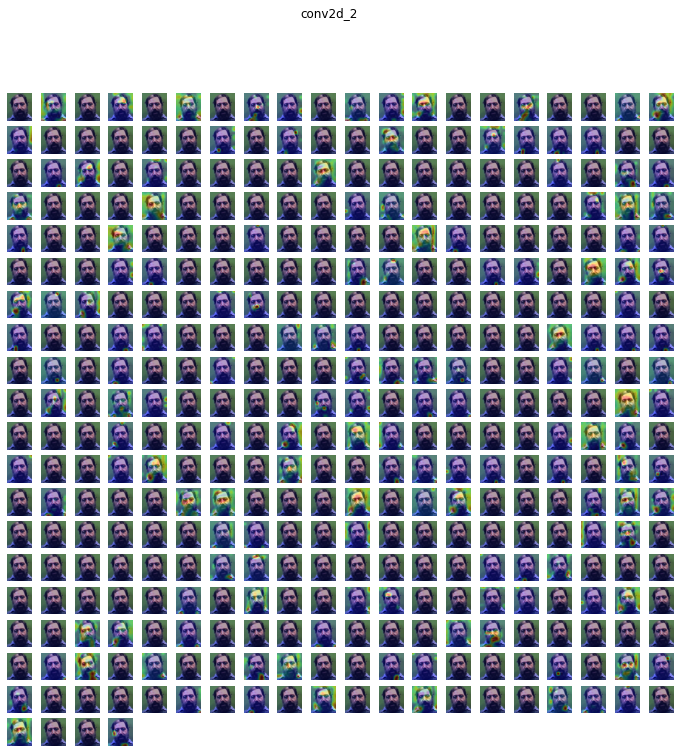

conv2d_3 (1, 11, 10, 384) 


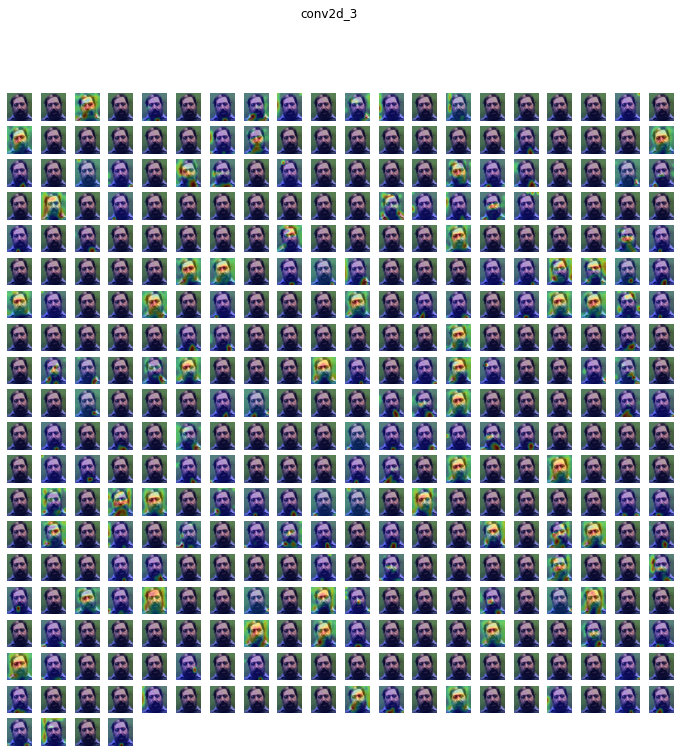

conv2d_4 (1, 11, 10, 256) 


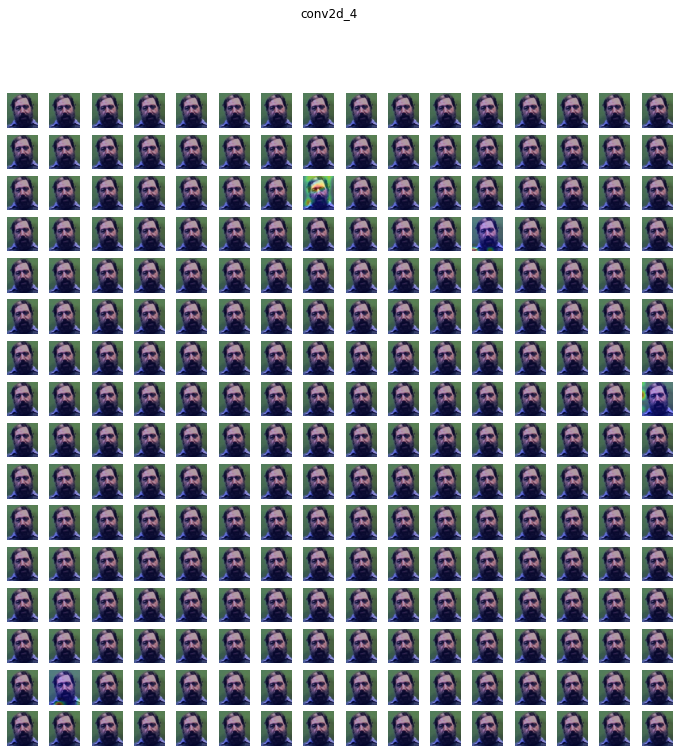

max_pooling2d_2 (1, 5, 4, 256) 


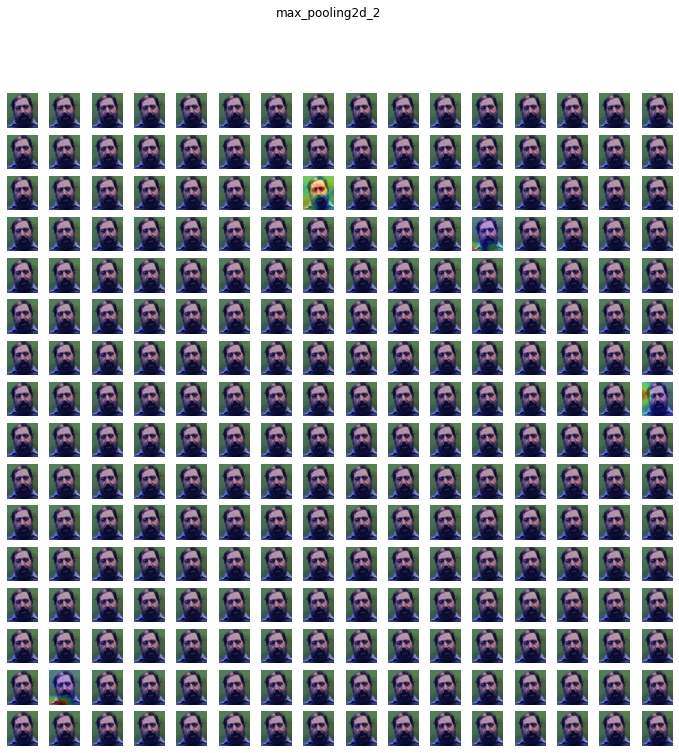

flatten (1, 5120) -> Skipped. 2D Activations.
dense (1, 4096) -> Skipped. 2D Activations.
dense_1 (1, 4096) -> Skipped. 2D Activations.
dense_2 (1, 7) -> Skipped. 2D Activations.


In [84]:
display_heatmaps(activations, keract_inputs, save=False)